# MMSB textbook figures

In [1]:
#cell1

In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [3]:
# convenience function

def _ts(tend, num=100):
    return np.linspace(0.0, tend, num=num)

def _mm(x, k=1):
    return x / (x + k)

def _mmr(x, k=1):
    return _mm(k, x)

def _hill(x, k, n):
    return _mm(x**n, k**n)

def _hillr(x, k, n):
    return _mmr(x**n, k**n)


# Fig 1.7

[Collins toggle switch](https://www.nature.com/articles/35002131)

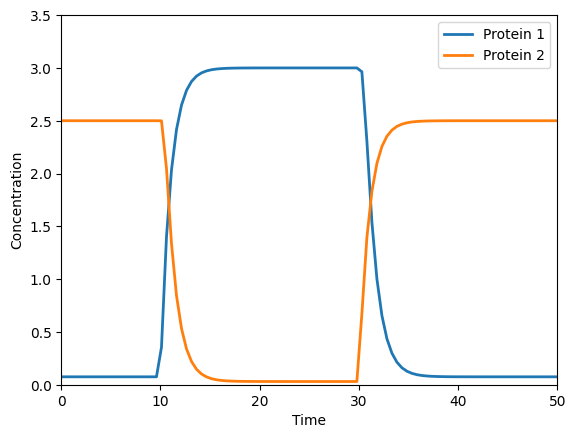

In [4]:
"""
model of Collins toggle switch
from Gardiner et al. (2000) Nature 403, pp. 339-342
Figures 1.7, 7.13, 7.14, 7.15
"""
# Model
def collin_toggle_switch(y, t, a1, a2, beta, gamma):
    p1, p2 = y
    i1 = 10 if 30 < t < 40 else 0
    i2 = 10 if 10 < t < 20 else 0
    """Collins toggle switch function"""
    dp1 = a1 * _hillr(p2, 1 + i2, beta) - p1
    dp2 = a2 * _hillr(p1, 1 + i1, gamma) - p2
    return [dp1, dp2]

# Initial conditions and parameters
ts = _ts(50.0)
y0 = [0.075, 2.5]
p = a1, a2, beta, gamma = 3, 2.5, 4, 4
sol = odeint(collin_toggle_switch, y0, ts, args=p)

# Plot the results
plt.figure()
plt.plot(ts, sol[:, 0], linewidth=2, label="Protein 1")
plt.plot(ts, sol[:, 1], linewidth=2, label="Protein 2")
plt.axis([ts[0], ts[-1], 0, 3.5])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(loc='best')
plt.savefig('./cell4.jpg')

# Figure 1.9

[Hodgkin-Huxley](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model) electrophysiology model

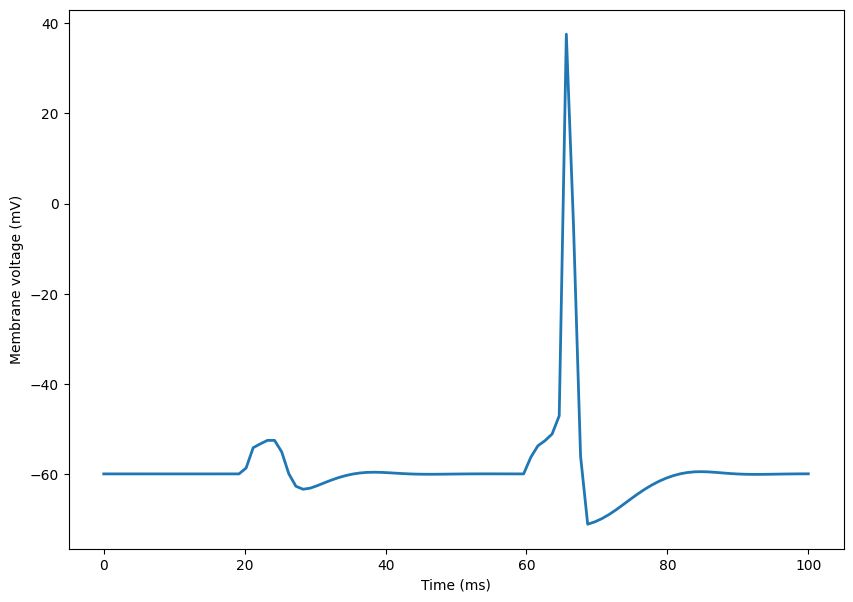

In [5]:
"""
Hodgkin-Huxley model of excitable barnacle muscle fiber
reviewed in Rinzel (1990) Bulletin of Mathematical Biology 52 pp. 5-23.
Figure 1.9 and problem 8.6.4
"""
from numpy import exp
from scipy.special import exprel

def _istim(t):
    if 20 < t <= 21:
        return -6.80
    elif 60 < t <= 61:
        return -6.90
    else:
        return 0

def hh_sys(v, m, h, n):
    "ODE system of Hodgkin-Huxley model"
    mAlfaV = -0.10 * (v + 35)
    mAlfa = 1 / exprel(mAlfaV)
    mBeta = 4.0 * exp(-(v + 60) / 18.0)
    dmdt = -(mAlfa + mBeta) * m + mAlfa

    hAlfa = 0.07 * exp(-(v+60)/20)
    hBeta = 1 / (exp(-(v+30)/10) + 1)
    dhdt  = -(hAlfa + hBeta) * h + hAlfa

    nAlfaV = -0.1 * (v+50)
    nAlfa = 0.1 / exprel(nAlfaV)
    nBeta = 0.125 * exp( -(v+60) / 80)
    dndt  = -(nAlfa + nBeta) * n + nAlfa

    return (dmdt, dhdt, dndt)


def hh_currents(v, m, h, n,
    E_N = 55,  # Reversal potential of Na
    E_K = -72,  # Reversal potential of K
    E_LEAK = -49.0,  # Reversal potential of leaky channels
    G_N_BAR = 120.0,  # Max. Na channel conductance
    G_K_BAR = 36.0,  # Max. K channel conductance
    G_LEAK = 0.30):  # Max. leak channel conductance
    "Hodgkin-Huxley channel currents"

    iNa = G_N_BAR * (v - E_N) * (m**3) * h
    iK = G_K_BAR * (v - E_K) * (n**4)
    iLeak = G_LEAK * (v - E_LEAK)

    return (iNa, iK, iLeak)


def hh_rhs(y, t,
    E_N = 55,  # Reversal potential of Na
    E_K = -72,  # Reversal potential of K
    E_LEAK = -49.0,  # Reversal potential of leaky channels
    G_N_BAR = 120.0,  # Max. Na channel conductance
    G_K_BAR = 36.0,  # Max. K channel conductance
    G_LEAK = 0.30,  # Max. leak channel conductance
    C_M = 1.0  # membrane capacitance iStim
    ):

    # Differential equations quations
    v, m, h, n = y

    (dmdt, dhdt, dndt) = hh_sys(v, m, h, n)
    (iNa, iK, iLeak) = hh_currents(v, m, h, n,
                                   E_N = E_N,
                                   E_K = E_K,
                                   E_LEAK = E_LEAK,
                                   G_N_BAR = G_N_BAR,
                                   G_K_BAR = G_K_BAR,
                                   G_LEAK = G_LEAK)

    dVdt = -(iNa + iK + iLeak + _istim(t)) / C_M
    return [dVdt, dmdt, dhdt, dndt]


# Initial conditions
y0 = v, m, h, n = -59.8977, 0.0536, 0.5925, 0.3192
ts = _ts(100)
sol = odeint(hh_rhs, y0, ts)
plt.figure(figsize=(10, 7))
plt.plot(ts, sol[:, 0], linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane voltage (mV)")
plt.savefig('./cell5.jpg')

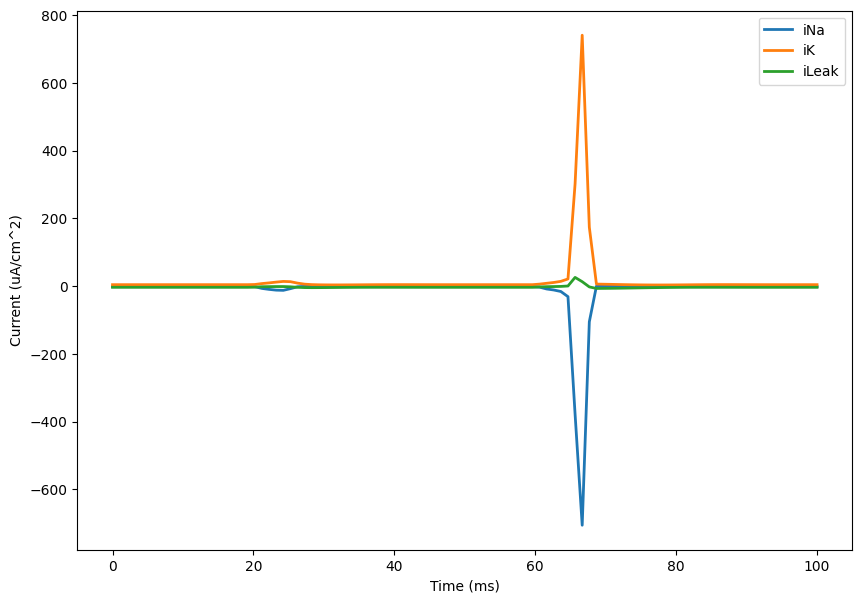

In [6]:
(iNa, iK, iLeak) = hh_currents(sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3])

plt.figure(figsize=(10, 7))
plt.plot(ts, iNa, linewidth=2, label="iNa")
plt.plot(ts, iK, linewidth=2, label="iK")
plt.plot(ts, iLeak, linewidth=2, label="iLeak")
plt.xlabel("Time (ms)")
plt.ylabel("Current (uA/cm^2)")
plt.legend(loc="best")
plt.savefig('./cell6.jpg')

In [7]:
#cell

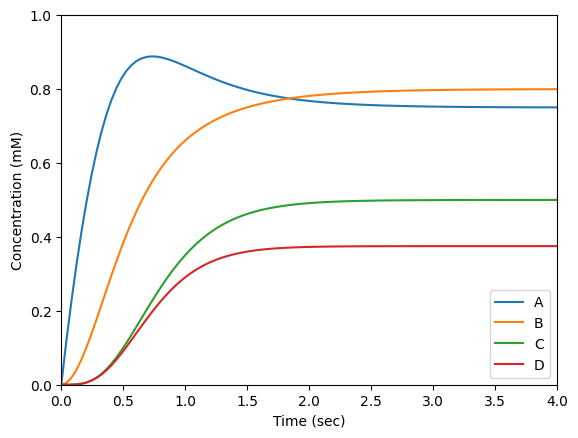

In [8]:
def rhs(y, t):
    a, b, c, d = y
    v1 = 2 * a
    v2 = 2.5 * a * b
    dA = 3 - v1 - v2
    dB = v1 - v2
    dC = v2 - 3 * c
    dD = v2 - 4 * d
    return [dA, dB, dC, dD]


ts = _ts(4.0)
y0 = [0, 0, 0, 0]
y = odeint(rhs, y0, ts)

plt.figure()
for i, leg in enumerate(('A', 'B', 'C', 'D')):
    plt.plot(ts, y[:, i], label=leg)

plt.axis([ts[0], ts[-1], 0, 1])
plt.legend(loc='best')
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mM)')
plt.savefig('./cell8.jpg')

# Fig 2.11, 2.12, 2.13, 2.14

Model reduction

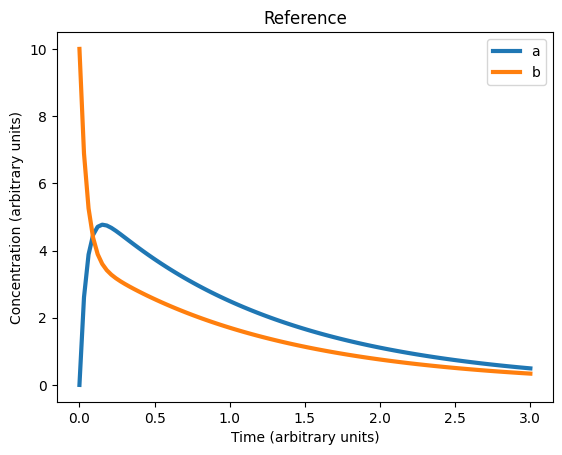

In [9]:
"""
Figure 2.11 (Fig 1) & Figure 2.12 (Fig 2)
Simulation and rapid equilibrium approximation
As well as figure 2.13 Rapid equilibrium approximation
"""

def original_rhs(y, t, k0, k1, km1, k2):
    a, b = y
    vf = k1 * a
    vb = km1 * b
    dA = k0 - vf + vb
    dB = vf - vb - k2 * b
    return [dA, dB]

def approx_rhs(y, t, k0, k1, km1, k2):
    b = k1 / (km1 + k1) * y
    return k0 - k2 * b

def qssa_rhs(y, t, k0, k1, km1, k2):
    return k0 - k2 * y

ts = _ts(3.0)

# Figure 2.11 (Fig 1)
p = k0, k1, km1, k2 = 0, 9, 12, 2
y0 = [0, 10]
sol = odeint(original_rhs, y0, ts, args=p)
plt.figure()
plt.title('Reference')
plt.plot(ts, sol, linewidth=3)
plt.legend(('a', 'b'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.savefig('./cell9.jpg')

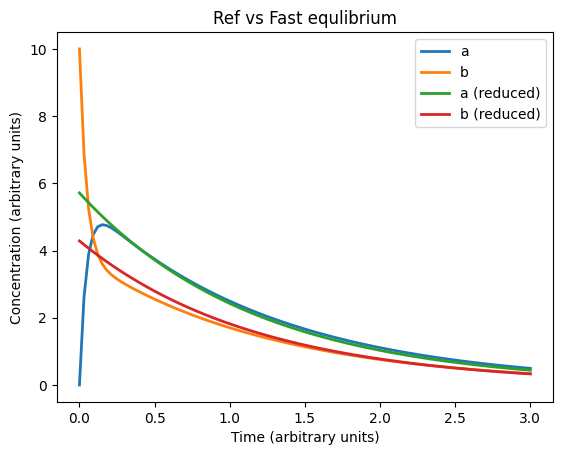

In [10]:
# Figure 2.12 (Fig 2)

y0 = [10]
sol_re = odeint(approx_rhs, y0, ts, args=p)
plt.figure()
plt.title('Ref vs Fast equlibrium')
plt.plot(ts, sol, linewidth=2)

plt.plot(ts, km1 / (km1 + k1) * sol_re, linewidth=2)
plt.plot(ts, k1 / (km1 + k1) * sol_re, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.savefig('./cell10.jpg')

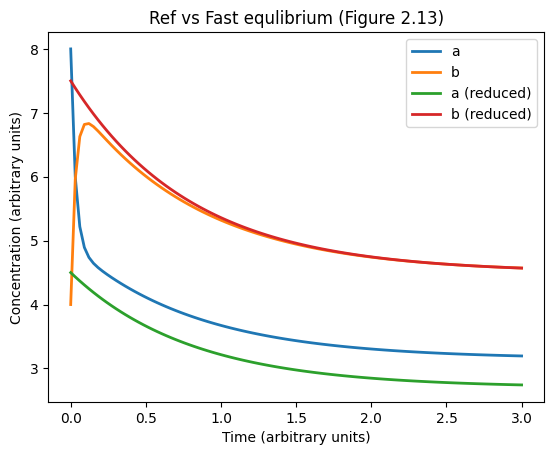

In [11]:
# Figure 2.13
p = k0, k1, km1, k2 = 9, 20, 12, 2
sol = odeint(original_rhs, [8, 4], ts, args=p)
sol_re = odeint(approx_rhs, [12], ts, args=p)
plt.figure()
plt.title('Ref vs Fast equlibrium (Figure 2.13)')
plt.plot(ts, sol, linewidth=2)
plt.plot(ts, km1 / (km1 + k1) * sol_re, linewidth=2)
plt.plot(ts, k1 / (km1 + k1) * sol_re, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.savefig('./cell11.jpg')

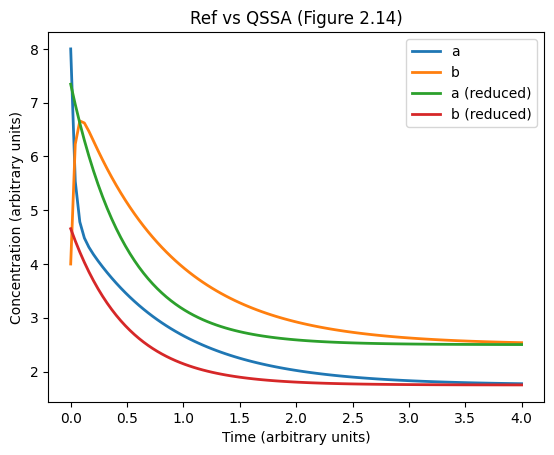

In [12]:
# Figure 2.14
ts = _ts(4.0)

p = k0, k1, km1, k2 = 5, 20, 12, 2
sol = odeint(original_rhs, [8, 4], ts, args=p)
sol_qss = odeint(qssa_rhs, [235/32], ts, args=p)

bQss = sol_qss
aQss = (k0 + km1 * bQss) / k1

plt.figure()
plt.title('Ref vs QSSA (Figure 2.14)')
plt.plot(ts, sol, linewidth=2)
plt.plot(ts, bQss, linewidth=2)
plt.plot(ts, aQss, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.savefig('./cell12.jpg')

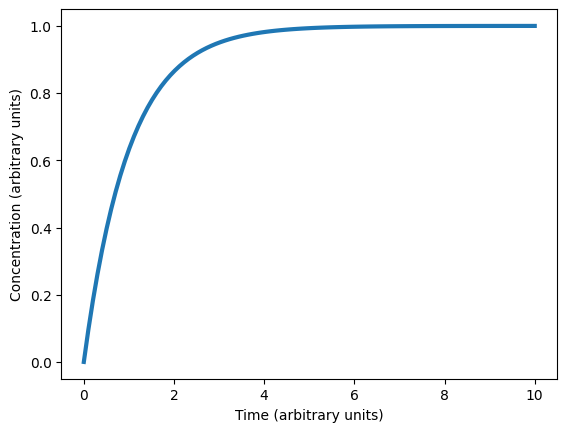

In [13]:
"""Problem 2.4.6"""
def rhs(y, t, k):
    return k - k*y

ts = _ts(10.0)
y0 = [0]

sol = odeint(rhs, y0, ts, args=(1, ))

plt.figure()
plt.plot(ts, sol, linewidth=3)
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')
plt.savefig('./cell13.jpg')

In [14]:
#cell